# Preprocessing Practice

In this lab, you will load and pre-process weather data.

We begin, by loading in the raw dataset. The following code downloads and extracts the dataset for you as a CSV.

In [1]:
!wget https://github.com/Hvass-Labs/weather-denmark/raw/master/weather-denmark.tar.gz
!tar -xvzf weather-denmark.tar.gz

--2020-06-21 17:00:55--  https://github.com/Hvass-Labs/weather-denmark/raw/master/weather-denmark.tar.gz
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Hvass-Labs/weather-denmark/master/weather-denmark.tar.gz [following]
--2020-06-21 17:00:55--  https://raw.githubusercontent.com/Hvass-Labs/weather-denmark/master/weather-denmark.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35332031 (34M) [application/octet-stream]
Saving to: ‘weather-denmark.tar.gz.1’

weather-denmark.tar 100%[===================>]  33.69M   114MB/s    in 0.3s    

2020-06-21 17:00:55 (114 MB/s) - ‘weather-denmark.tar.gz.1’

Now you take over! 

In [2]:
import pandas as pd

df = pd.read_csv('weather-denmark.csv')
df.head()

,City,DateTime,Temp,Pressure,WindSpeed,WindDir
0,Aalborg,1980-03-01 00:00:00,5.0,1008.1,11.3,290.0
1,Aalborg,1980-03-01 00:20:00,4.0,NaN,9.2,270.0
2,Aalborg,1980-03-01 00:50:00,4.0,NaN,9.2,280.0
3,Aalborg,1980-03-01 01:20:00,4.0,NaN,9.2,280.0
4,Aalborg,1980-03-01 01:50:00,4.0,NaN,8.7,270.0


## Tasks

1. What is the data? 
2. Read and make useful plots of the data.
3. [Clean up the data #1] Check for and (if necessary) remove missing values.
4. [Clean up the data #2] Resample the data to a useful frequency (maybe hourly?).
5. Choose a prediction task. What prediction tasks are possible/reasonable?
6. [Baseline #1] Add a column to predict the previous timestep. What is the MSE?
6. [Baseline #2] Add a rolling average column to the data. What is the MSE?
6. [Baseline #3] Compute another baseline or pre-processing step of your choice (e.g., myou might consider smoothing, autoregressive model, etc.). 
6. [Prepare for RNN #1] Break your data into train, validation, and test. Why do we do this before processing for input to the RNN?
7. [Prepare for RNN #2] Recall that each input to an RNN is a *sequence*. Construct two Numpy arrays from your dataframe to be your train data and train labels.

Task 1:

Measures temperature, barometric pressure, wind-spreed, and wind-direction in 5 Danish cities. Some of the data is missing.

Task 2:

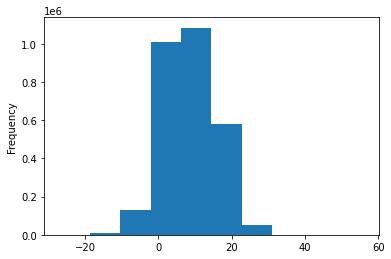

In [3]:
df['Temp'].plot.hist()

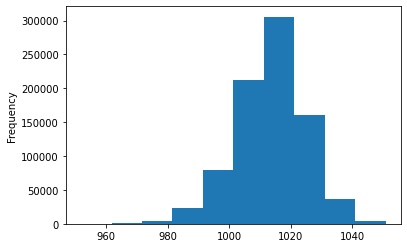

In [4]:
df['Pressure'].plot.hist()

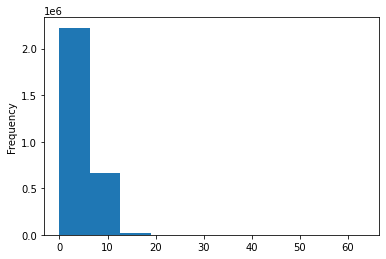

In [5]:
df['WindSpeed'].plot.hist()

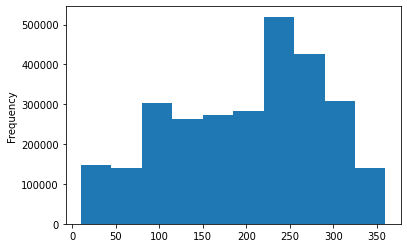

In [6]:
df['WindDir'].plot.hist()

In [9]:
df['Time'] = pd.to_datetime(df['DateTime'])

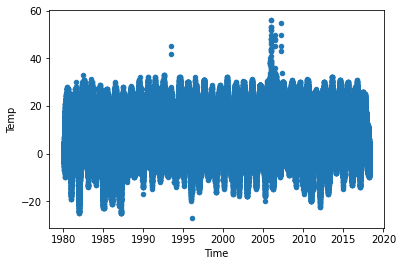

In [11]:
df.plot.scatter(x='Time', y='Temp')

In [16]:
df = df.set_index(['City', 'Time'])
df.head()

KeyError: ignored

In [20]:
df = df.drop(columns=['DateTime'])
df.head()

Temp  Pressure  WindSpeed  WindDir
City    Time                                                   
Aalborg 1980-03-01 00:00:00   5.0    1008.1       11.3    290.0
        1980-03-01 00:20:00   4.0       NaN        9.2    270.0
        1980-03-01 00:50:00   4.0       NaN        9.2    280.0
        1980-03-01 01:20:00   4.0       NaN        9.2    280.0
        1980-03-01 01:50:00   4.0       NaN        8.7    270.0

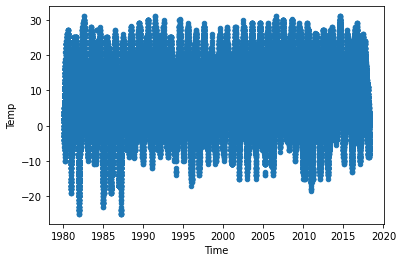

In [12]:
aalborg_graph_df = df[df['City'] == 'Aalborg']
aalborg_graph_df.plot.scatter(x='Time', y='Temp')

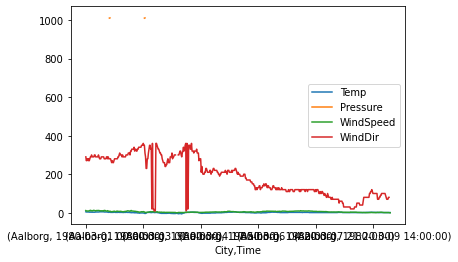

In [34]:
df.loc[('Aalborg', '1980-03-01 00:00:00') : ('Aalborg', '1980-03-10 00:00:00')].plot()

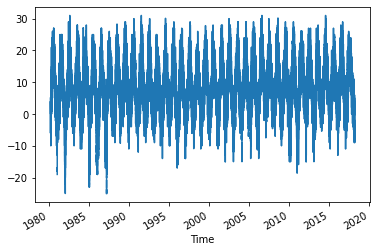

In [35]:
df.loc['Aalborg', 'Temp'].plot()

Removing Missing Values



In [39]:
data = df.loc['Aalborg'].drop(columns=['Pressure'])
data.head(10)

,Temp,WindSpeed,WindDir
Time,,,
1980-03-01 00:00:00,5.0,11.3,290.0
1980-03-01 00:20:00,4.0,9.2,270.0
1980-03-01 00:50:00,4.0,9.2,280.0
1980-03-01 01:20:00,4.0,9.2,280.0
1980-03-01 01:50:00,4.0,8.7,270.0
1980-03-01 02:20:00,4.0,9.2,280.0
1980-03-01 03:00:00,3.0,10.3,270.0
1980-03-01 03:20:00,4.0,11.8,280.0
1980-03-01 04:00:00,3.0,12.8,290.0


In [40]:
data.isnull().sum().sum() # - total number of null values

30095

In [51]:
data = data.dropna()

In [52]:
data.isnull().sum().sum() # - total number of null values is now 0

0

In [53]:
data.head()

,Temp,WindSpeed,WindDir
Time,,,
1980-03-01 00:00:00,5.0,11.3,290.0
1980-03-01 00:20:00,4.0,9.2,270.0
1980-03-01 00:50:00,4.0,9.2,280.0
1980-03-01 01:20:00,4.0,9.2,280.0
1980-03-01 01:50:00,4.0,8.7,270.0
